In [1]:
%matplotlib inline
import helper

# Tutorial 1 (TensorFlow Basics)

## Preliminaries

Make sure you are working (crashing) the correct machine. The hostnames are `cgpool12XX` in the computer pool.

In [2]:
!hostname

RobsLaptop


Which ressources/GPU are available? Even if there nobody physically sitting in front of the machine. The GPU might be occupied. Let's check that:

In [3]:
!nvidia-smi

Der Befehl "nvidia-smi" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


## TensorFlow

So, let's start with a basic comparison between NumPy and Tensorflow 

In [4]:
import tensorflow as tf
import numpy as np

In NumPy operations, simpler calculations can be evaluated and visualized interactively. Let's look at some examples.

In [5]:
A = np.matrix([[1., 2, 3], [4, 5, 6], [7, 8, 9]], dtype=np.float32) # a 3 x 3 matrix with pre-defined values
Z = np.zeros((3,3), dtype=np.float32)                               # a 3 x 3 matrix with 0's
T = 2 * np.ones((3,3), dtype=np.float32)                            # a 3 x 3 matrix with 2's

Now we shall do some interactive operations on them, basically addition and substraction. Subsequently we will print out the results for visualization.

In [6]:
# addition

result_sum1 = A + T
result_sum2 = A + Z

# multiplication

result_mul1 = A * T
result_mul2 = A * Z

# add matrix multiplication wherever possible


In [7]:
# print them and check the results by youself

print(result_sum1)
print(result_sum2)
print(result_mul1)
print(result_mul2)

[[ 3.  4.  5.]
 [ 6.  7.  8.]
 [ 9. 10. 11.]]
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
[[12. 12. 12.]
 [30. 30. 30.]
 [48. 48. 48.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


So until now, you have already been acquainted with easy and basic functionalities of the NumPy basics. You can try out your own matrix variables and look out for the results.

Let's have a look on how the same operations are handled by Tensorflow. It should be pointed out that Tensorflow doesn't directly produce the results outright. It produces a graph of the given operations and the operation could be accessed only after a session is run. We will dive into more details in the following exercises. But first, let's just start with a very basic variable addition.

In [8]:
# Implementing addition 

A = tf.constant([[1., 2, 3], [4, 5, 6], [7, 8, 9]], dtype=tf.float32) # variable initialized 
Z = tf.zeros((3,3), dtype=tf.float32)                               # a 3 x 3 matrix with 0's
T = 2 * tf.ones((3,3), dtype=tf.float32)                            # a 3 x 3 matrix with 2's

X = A + Z

http://devdocs.io/tensorflow~python/tf/zeros

Here's the deal. If you just print the value of the resultant variable, you will just obtain the tensor variable details. Not the result itself.

In [9]:
print dir(X)
print '----------'
print X.op

SyntaxError: invalid syntax (<ipython-input-9-32747a6fa368>, line 1)

In order to get the result, you will have to run something else. Something on the lines of :

In [10]:
with tf.Session() as sess:
    print(sess.run(X))

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


So, what happened here? In Tensorflow, in order to evaluate expressions, we need a session to obtain the results. This is what was achieved here. After the successful run, we just ran print operation on it.

Now, let's delve a little bit deeper with a little bit more complicated matrix initialization and operations.

In [11]:
tf.reset_default_graph() # Just to reset the graph and session

A = tf.Variable([[1,2,3],[4,5,6],[7,8,9]], dtype=tf.float32, name="var_A") # we can name our variables
B = tf.Variable([[1,1,1],[1,1,1],[1,1,1]], dtype=tf.float32, name="var_B")

As shown previously, we will define some basic operations such as addition and multiplication.  

In [12]:
summ = tf.add(A, B, name='sum') # we can name our operations such as 'sum'
mul = tf.matmul(A, B, name='mult') # matrix multiplication

In [13]:
helper.show_graph(tf.get_default_graph().as_graph_def())

TypeError: '<stripped 36 bytes>' has type <class 'str'>, but expected one of: ((<class 'bytes'>,),)

In order to evaluate the symbolic expressions, we will need a session. 
Immediately after that, we will initialize the variables.

In [14]:
sess = tf.InteractiveSession() # session declared
sess.run(A)

FailedPreconditionError: Attempting to use uninitialized value var_A
	 [[Node: _send_var_A_0 = _Send[T=DT_FLOAT, client_terminated=true, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/cpu:0", send_device_incarnation=1368777510329159804, tensor_name="var_A:0", _device="/job:localhost/replica:0/task:0/cpu:0"](var_A)]]

In [15]:
sess.run(tf.global_variables_initializer()) #variables initialized
sess.run(A)

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]], dtype=float32)

Let's print the results following the usual steps as defined before.

In [16]:
print 'The sum of the matrices are:'
print sess.run(summ)
print 'The matrix-product of the matrices are:'
print sess.run(mul)

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-16-de7fe9d0b574>, line 1)

If you already have a rough idea about the variable initialisation and operations, we will try to delve into some deeper operations with the given packages.

# Quadratic Minimization  with Tensorflow 

We will delve into some deeper details regarding the utilities of Tensorflow operations. In our case, we will follow up the case of Quadratic minimization.

We will divide this section into two parts, one where we compute the gradient manually (not exactly from scratch) and the next one will be implemented directly with the help of tensorflow optimizer function. The first part will also have a subpart.

So let's get started.

Say we want to minimize the following function:

$$ f(x) = \frac{1}{2} x^{T} A x -b^{T}x + c$$

minimizing for $x$, let us assume that 
$$
x = \left[
 \begin{matrix}
  9 & 2 \\
  2 & 10 
  \end{matrix}\right]
$$

while 
$$ b = \left[\begin{matrix}
  5 \\ 6 
  \end{matrix}\right]$$
and let $$c=42$$

Our next step will be to initialize all the given variables , which we have done in the following cell.

In [17]:
x = tf.Variable(np.random.rand(2,1), dtype=tf.float32, name="x")
# we already make clear, that we are not going to optimize these variables
b = tf.Variable([[5],[6]], dtype=tf.float32, trainable=False, name="b")
A = tf.Variable([[9,2],[2,10]], dtype=tf.float32, trainable=False, name="A")
sess.run(tf.global_variables_initializer())

Before proceeding forward, let us go through the problem. We know that for a local optima, the following condition holds for a function $f(x)$ :
$$f^{'}(x)=0$$

In our context, which means (see favourite linear-algebra-lecture or http://www.matrixcalculus.org/)

$$ f^{'}(x) =  0.5(A+A^T)\cdot x-b=  A\cdot x-b = 0 \implies Ax^\star =b$$


In [19]:
# solving Ax=b for x is as easy as:
xstar = tf.matrix_solve_ls(A, b)
# now we just print the solution
print "x=", sess.run(xstar)
objective = 0.5 * tf.matmul(tf.matmul(tf.transpose(xstar), A), xstar) - tf.matmul(tf.transpose(b), xstar) + 42
print "f(x)=", sess.run(objective)

SyntaxError: invalid syntax (<ipython-input-19-07a558efc444>, line 4)

We can test the validity of the solution by rechecking the conditions stated above, via following:

In [20]:
# test A*x - b = 0 ?
sess.run(tf.matmul(A, xstar) - b)

NameError: name 'xstar' is not defined

So, it is what we intended it to be.


Now let's move on to the next part of the section. It is true that we have an optimal point, but the problems will not be as easy as mentioned here. So to provide a sure solution, we know that when we are computing gradient, the gradient always points to the direction of steepest increment. If we use gradient descent, we can easily visualise that 

$$x \leftarrow x - \eta f^{'}(x)$$

What we can conclude from this case is that since the gradient is moving towards the maxima, if we move exactly opposite to it in very small steps say $\eta$ then we can expect to reach our minima.

In [21]:
# destroy previous session and graph and create new session
tf.reset_default_graph()
sess = tf.InteractiveSession()

# define variables in the problem
x = tf.Variable(np.random.rand(2,1), dtype=tf.float32, name="x")
b = tf.Variable([[5],[6]], dtype=tf.float32, trainable=False, name="b")
A = tf.Variable([[9,2],[2,10]], dtype=tf.float32, trainable=False, name="A")
sess.run(tf.global_variables_initializer())

# define expressions
objective = 0.5 * tf.matmul(tf.matmul(tf.transpose(x), A), x) - tf.matmul(tf.transpose(b), x) + 42

grad = tf.matmul(A, x) - b            # this is new

optimize_op = x.assign(x - 0.01 * grad) # here, eta is chosen as 0.01 in this case


Basicallly, we have fixed a direction for the variable $x$ and we expect it to go in that direction to obtain the minima. And it is self-evident that it will stop asssigning it to itself when the gradient is finally zero. So we run this operation for say, couple hundred times and expect the gradient to reach zero value by then.

In [22]:
for i in range(300):
    sess.run(optimize_op)
print sess.run(objective)

# and it will converge at the 'same' point.
print sess.run(x)

SyntaxError: invalid syntax (<ipython-input-22-669b1f1fd900>, line 3)

So we finally, we have our final values by as stated above.

But we will not stop ourselves here, as we already have an inbuilt option in tensorflow for computing the optimization operation for us. So in this section we start with a random point at first and then use a special function to optimize the operation.

In [23]:
#### with tensor stuff

# start at some random point again
sess.run(x.assign(np.random.rand(2,1)))
objective = 0.5 * tf.matmul(tf.matmul(tf.transpose(x), A), x) - tf.matmul(tf.transpose(b), x) + 42


##################### tf.gradients #################################
grad = tf.gradients(objective, x)[0]   # get gradient from objective wrt. to x
optimize_op = x.assign(x - 0.01 * grad)

In [24]:
# we already covered this code
for i in range(300):
    sess.run(optimize_op)
print sess.run(objective)

SyntaxError: invalid syntax (<ipython-input-24-4ef5661c6b1d>, line 4)

In [24]:
print sess.run(x)

[[0.4418607 ]
 [0.51162755]]


So, the obvious question, why we just did that? 

The answer is simple. For very complicated high dimensional problems we will not be very lucky to have a derivative form , as we had manually calculated and placed them before. Tensorflow does gradient operation using reverse-mode auto-differentiation. For more details, you can visit Tensorflow's official documentation for gradient function.

And well, we can always make things easier for us, by using the inbuilt Gradient Descent Optimizer from Tensorflow. This is a very basic tool used for optimization operation in general usage for Tensorflow.

In [25]:
sess.run(x.assign(np.random.rand(2,1)))

#### Here #################
optimize_op = tf.train.GradientDescentOptimizer(0.01).minimize(objective)
###########################

for i in range(300):
    sess.run(optimize_op)
print sess.run(objective)

[[39.360466]]


# Finding hyperparameters

In general hyperparameters in machine learning denote those variables which are fixed before the learning process begins. Rest of the variables are supossed to be obtianed from training.

In this section we will try to find the correct step sizes for the function optimization. Basically, how to chose a usefule step size to ensure convergence.



In [29]:
def rosenbrock(x, y):
    # stress test for any optimizer
    a, b = 1., 100.
    f = (a - x)**2 + b *(y - x**2 )**2
    x_solution = (a, a*a)
    return  f, x_solution

xx, yy = np.meshgrid(np.linspace(-1.3, 1.3, 31), np.linspace(-0.9, 1.7, 31))
zz, solution = rosenbrock(xx, yy)

# produce a graph, show anime how convergance is done


In [46]:
# destroy previous session and graph and create new session
tf.reset_default_graph()
sess = tf.InteractiveSession()

x0 = (-0.5, 0.9)

x = tf.Variable(0, dtype=tf.float64, name="x")
y = tf.Variable(0, dtype=tf.float64, name="y")
objective, _ = rosenbrock(x,y)

optimizer = []
optimizer.append(tf.train.RMSPropOptimizer(0.02).minimize(objective))
optimizer.append(tf.train.GradientDescentOptimizer(0.002).minimize(objective))
optimizer.append(tf.train.AdamOptimizer(0.3).minimize(objective))
optimizer.append(tf.train.MomentumOptimizer(0.002, 0.9).minimize(objective))
optimizer.append(tf.train.AdadeltaOptimizer(0.1).minimize(objective))
optimizer.append(tf.train.AdagradOptimizer(0.1).minimize(objective))

sess.run(tf.global_variables_initializer())

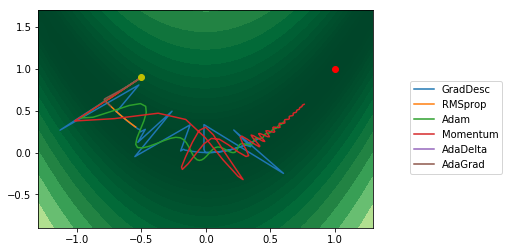

In [47]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.contourf(xx, yy, zz, np.logspace(-5, 3, 60), cmap="YlGn_r");
for opt_op in optimizer:
    steps = [x0]
    sess.run([x.assign(x0[0]), y.assign(x0[1])])
    for i in range(100):
        sess.run(opt_op)
        steps.append(sess.run([x, y]))

    steps = np.array(steps)
    ax.plot(steps[:,0], steps[:,1])

ax.plot((x0[0]), (x0[1]), 'o', color='y')
ax.plot(solution[0], solution[1], 'o', color='r');
ax.legend(['GradDesc', 'RMSprop', 'Adam', 'Momentum', 'AdaDelta', 'AdaGrad'],
          bbox_to_anchor=(1.4, 0.7));


In [52]:
# destroy previous session and graph and create new session
tf.reset_default_graph()
sess = tf.InteractiveSession()

x0 = (-0.5, 0.9)

x = tf.Variable(0, dtype=tf.float64, name="x")
y = tf.Variable(0, dtype=tf.float64, name="y")
objective, _ = rosenbrock(x,y)

optimizer = []
optimizer.append(tf.train.RMSPropOptimizer(0.001).minimize(objective))
optimizer.append(tf.train.RMSPropOptimizer(0.02).minimize(objective))
optimizer.append(tf.train.RMSPropOptimizer(0.2).minimize(objective))
#optimizer.append(tf.train.RMSPropOptimizer(2).minimize(objective))


sess.run(tf.global_variables_initializer())

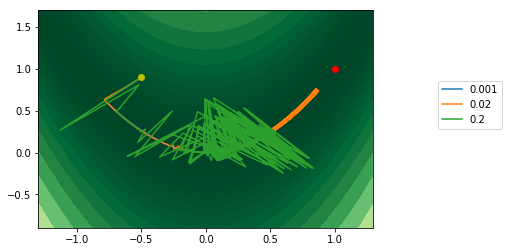

In [53]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.contourf(xx, yy, zz, np.logspace(-5, 3, 60), cmap="YlGn_r");
for opt_op in optimizer:
    steps = [x0]
    sess.run([x.assign(x0[0]), y.assign(x0[1])])
    for i in range(1000):
        sess.run(opt_op)
        steps.append(sess.run([x, y]))

    steps = np.array(steps)
    ax.plot(steps[:,0], steps[:,1])

ax.plot((x0[0]), (x0[1]), 'o', color='y')
ax.plot(solution[0], solution[1], 'o', color='r');
ax.legend(['0.001','0.02', '0.2'],
          bbox_to_anchor=(1.4, 0.7));


# Placeholder Operations

Placeholders are basically executed for operational functionality. As you will know later, it plays a monumental role in serial image loading for training neural networks. 

Basically Placeholders are allocated for storage of data and need not be initialised in the beginning as Variables need to be. They can be fed directly during session run-time. As it has been mentioned, this functionality helps a lot in training modules. This will be shown in the later part of the course.

In [54]:
A = tf.Variable([[1,2],[3,4]], dtype=tf.float32)
# symbolic node for "feed" data
B = tf.placeholder(shape=(2,2), dtype=tf.float32, name="my_placeholder")
sess.run(tf.global_variables_initializer())

print A + B

Tensor("add_1:0", shape=(2, 2), dtype=float32)


In [56]:
print sess.run(A + B)

InvalidArgumentError: You must feed a value for placeholder tensor 'my_placeholder' with dtype float and shape [2,2]
	 [[Node: my_placeholder = Placeholder[dtype=DT_FLOAT, shape=[2,2], _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]
	 [[Node: add_2/_17 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_9_add_2", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op u'my_placeholder', defined at:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/wieschol/.local/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/wieschol/.local/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/wieschol/.local/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/wieschol/.local/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/wieschol/.local/lib/python2.7/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/home/wieschol/.local/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/wieschol/.local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/wieschol/.local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/wieschol/.local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/wieschol/.local/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/wieschol/.local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/wieschol/.local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/wieschol/.local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/wieschol/.local/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/wieschol/.local/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/wieschol/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/wieschol/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/wieschol/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-54-fcabbbd75e1d>", line 3, in <module>
    B = tf.placeholder(shape=(2,2), dtype=tf.float32, name="my_placeholder")
  File "/home/wieschol/.local/lib/python2.7/site-packages/tensorflow/python/ops/array_ops.py", line 1782, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "/home/wieschol/.local/lib/python2.7/site-packages/tensorflow/python/ops/gen_array_ops.py", line 4520, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/home/wieschol/.local/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/wieschol/.local/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 3327, in create_op
    op_def=op_def)
  File "/home/wieschol/.local/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1674, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'my_placeholder' with dtype float and shape [2,2]
	 [[Node: my_placeholder = Placeholder[dtype=DT_FLOAT, shape=[2,2], _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]
	 [[Node: add_2/_17 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_9_add_2", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


`You must feed a value for placeholder tensor 'my_placeholder' with dtype float and shape [2,2]`

In [59]:
print "------- result 1 -------\n", sess.run(A + B, feed_dict={B: np.zeros((2,2))})
print "------- result 2 -------\n", sess.run(A + B, feed_dict={B: np.ones((2,2))})
print "------- result 3 -------\n", sess.run(A + B, feed_dict={B: np.random.randn(2,2)})

------- result 1 -------
[[1. 2.]
 [3. 4.]]
------- result 2 -------
[[2. 3.]
 [4. 5.]]
------- result 3 -------
[[1.404434  1.3270924]
 [4.134986  4.693927 ]]


In [60]:
# supposed to be wrong
print "------- result 1 -------\n", sess.run(A + B, feed_dict={B: np.zeros((2,1))})


------- result 1 -------


ValueError: Cannot feed value of shape (2, 1) for Tensor u'my_placeholder:0', which has shape '(2, 2)'

# Saving and Loading Graph and Weights

A basic graph structure already consists of several information. It includes the graph structure itself and the internal variables and constants. Some basic programms will be shown to provide a general idea.

The general idea is to save your graph at some point in your training run time as you will know later in this course. In order to resume the training, you can access this graph structure *and* those variable state to start training again from that point. These are saved in the form of checkpoints.

This is a very important functionality of Tensorflow and we will cover a basic part of it usage in the beginning. Later we wiil try to save entire networks during runtime, which will be shown later in the course.


In [61]:
tf.reset_default_graph()
A = tf.Variable([[1,2],[3,4]], dtype=tf.float32, name="varA")
B = tf.Variable([[1,2],[1,2]], dtype=tf.float32, name="varB")
C = tf.add(A, B, name='varC')

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

# override initial value
print sess.run(A.assign(np.zeros((2,2))))


[[0. 0.]
 [0. 0.]]


Let's insert a new folder from where we are and we will save our graph in a particular location.

In [62]:
# remove temporarily files
!rm -r /tmp/model
!mkdir /tmp/model

# serialize current model and save it into /tmp/model/
saver = tf.train.Saver(tf.global_variables())
saver.save(sess, '/tmp/model/my_model')


rm: cannot remove '/tmp/model': No such file or directory


'/tmp/model/my_model'

Now that we have saved the model, let's check what we have inside the folder.

In [63]:
# list all files that have been created
!ls /tmp/model -l | grep ^- | awk '{print $9}'

checkpoint
my_model.data-00000-of-00001
my_model.index
my_model.meta


Meta file is a protocol buffer file which saves the complete Tensorflow graph; i.e. all variables, operations, collections etc. We have two files namely *index* and and *.data*. The *.data* file contains the information about the variables and we will go after it in order to access the varaibles.
Along with this, TensorFlow also has a file named checkpoint which simply keeps a record of latest checkpoint files saved.

In order to be accessed by the program, we need to provide a path, which can be found out by the following command: 

In [64]:
!cat /tmp/model/checkpoint

model_checkpoint_path: "/tmp/model/my_model"
all_model_checkpoint_paths: "/tmp/model/my_model"


Now let's restore all *initial* information (**graph** + **initial values**). Here we will do that by loading the graph and values from file. But first, let's recheck the current value.

In [65]:
tf.reset_default_graph()
sess = tf.InteractiveSession()

# load the computation graph
loader = tf.train.import_meta_graph('/tmp/model/my_model.meta')

sess.run(tf.global_variables_initializer()) 

A = tf.get_default_graph().get_tensor_by_name('varA:0')
print sess.run(A)

[[1. 2.]
 [3. 4.]]


But the last variable assigend were zeros and now, we will restore the values via calling the restore function.

In [66]:
loader = loader.restore(sess, '/tmp/model/my_model') # load latest values
print sess.run(A) # now everything is fine

INFO:tensorflow:Restoring parameters from /tmp/model/my_model
[[0. 0.]
 [0. 0.]]


If you want to see how the graph actually stores the variable, it can be easily visualized by the following way. Along with that, nodes and varaiables can also be accessed and visualized in the same way. 

In [67]:
# if you wonder how the graph is actually store, you can print a readable-version of the ProtoBuf by
print tf.get_default_graph().as_graph_def()

node {
  name: "varA/initial_value"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_FLOAT
        tensor_shape {
          dim {
            size: 2
          }
          dim {
            size: 2
          }
        }
        tensor_content: "\000\000\200?\000\000\000@\000\000@@\000\000\200@"
      }
    }
  }
}
node {
  name: "varA"
  op: "VariableV2"
  attr {
    key: "container"
    value {
      s: ""
    }
  }
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "shape"
    value {
      shape {
        dim {
          size: 2
        }
        dim {
          size: 2
        }
      }
    }
  }
  attr {
    key: "shared_name"
    value {
      s: ""
    }
  }
}
node {
  name: "varA/Assign"
  op: "Assign"
  input: "varA"
  input: "varA/initial_value"
  attr {
    key: "T"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "_class"
 

In [68]:
# and also list all nodes
for node in tf.get_default_graph().as_graph_def().node:
    print node.name


varA/initial_value
varA
varA/Assign
varA/read
varB/initial_value
varB
varB/Assign
varB/read
varC
init
Assign/value
Assign
save/Const
save/SaveV2/tensor_names
save/SaveV2/shape_and_slices
save/SaveV2
save/control_dependency
save/RestoreV2/tensor_names
save/RestoreV2/shape_and_slices
save/RestoreV2
save/Assign
save/Assign_1
save/restore_all
init_1


In [ ]:
# and all variables
for var in tf.global_variables():
    print var.name


# If we only want to load the values

In case where we only want to load the values, we can also exploit the functionalities provided by tensorflow in the following manner: 

In [69]:
tf.reset_default_graph()
A = tf.Variable([[1,2],[3,4]], dtype=tf.float32, name="varA")
B = tf.Variable([[1,2],[1,2]], dtype=tf.float32, name="varB")

newC = tf.multiply(A, B)
C = tf.add(A, newC, name='varC')

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
print sess.run(A)

tf.train.Saver().restore(sess, '/tmp/model/my_model') # only load the values not the graph 
print sess.run(A)

[[1. 2.]
 [3. 4.]]
INFO:tensorflow:Restoring parameters from /tmp/model/my_model
[[0. 0.]
 [0. 0.]]
